In [2]:
# Importaciones de librerías
import pandas as pd
import numpy as np

In [4]:
# Importo el df earthquake
df = pd.read_csv('/Users/inesmurcortes/Documents/GitHub/Eathquake/earthquake.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

La información de las variables la he sacado de la siguiente web https://earthquake.usgs.gov/data/comcat
El dataset está compuesto de 23 columnas, a través de las cuales se registra cada uno de los terremotos superiores a 5.5 en la escala de Ritcter. 
Las columnas devuelven la siguiente información:

* Time -> Formato 1970-01-01T00:00:00.000Z de cuando el seísmo inicia la ruptura.
* Place -> Lugar donde se registra el seísmo. Popurrí de strings.
* Latitude -> Latitud
* Longitude -> Longitud
* Depth -> Valor de la profundidad a la que un evento sísmico empieza su ruptura. Toma valores típicos entre 0-1.000. 
* Mag -> Magnitud del evento sísmico medido en la escala Richter.
* MagType -> Método/ Algoritmo utilizado para calcular la magnitud del evento. 
* nst -> Número de estaciones sísmicas utilizadas para determinar la ubicación del evento sísmico.
* gap -> La mayor brecha azimutal entre estaciones azimutalmente adyacentes (en grados). Cuanto menor sea este número, más fiable será la posición horizontal calculada del terremoto.
* dmin -> Distancia horizontal desde el epicentro del evento sísmico a la estación que realiza la lectura del evento sísmico. Medido en grados. 1º = 111.2 km.
* rms -> Tiempo de viaje raíz-cuadrado medio residual (RMS) medido en segundos. Proporciona una medida de ajuste de los tiempos de llegada de los eventos sísmicos con respecto a los tiempos de llegada previstos para esta ubicación. 
* net -> ID del contribuidor de la información, identificado a través de la red. 
* ID -> Identificador único del evento sísmico.
* Updated -> Momento en el que el evento fue actualizado. 
* Unnamed: 14 -> Columna de todo nulls. Para borrar directamente.
* Type -> Tipo de evento sísmico. Puede tomar los valores 'earthquake', 'volcanic eruption', 'nuclear explosion', 'explosion'. El resto de categorías son anecdóticas en comparación con la de earthquake. 
* horizontalError -> Error de la distancia (horizontal) medido en km. Los valores típicos oscilan entre 0-100 km. Hay muchísimos nulos.
* depthError -> Error de la profundidad (vertical) medido en km. Los valores típicos oscilan entre 0-100 km. 
* magError -> Incertidumbre del reporte de la magnitud del evento. 
* magNst -> Número total de estaciones sísmica utilizadas para calcular la magnitud del terremoto.
* status -> Revisión de eventos sísmicos, variable que puede tomar el valor 'reviewed' si el evento sísmico ha sido verificado por una persona antes de ser publicado o 'automatic' en caso de que haya sido publicado por los procesos automáticos de los sistemas de detección sísmica.
* locationSource -> Red que originó el reporte de la localización del evento sísmico. Son 54 categorías diferentes que, por lo que parece en el análisis preliminar, tiene relación directa con la ubicación donde se produjo el terremoto.
* magSource -> Red que originó el reporte de la magnitud del evento sísmico. En el 71% de las ocasiones se trata del mismo centro el que dice lo de la localización que lo de la magnitud. 

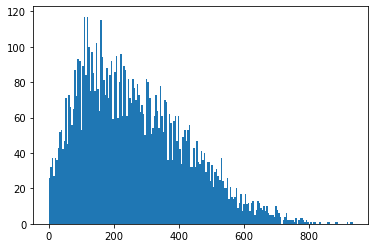

In [58]:
import matplotlib.pyplot as plt
plt.hist(df.nst, bins=200)
plt.show()

In [43]:
df.Type.unique()

array(['earthquake', 'volcanic eruption', 'nuclear explosion',
       'explosion'], dtype=object)

In [44]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        #fig = sns.countplot(x=col)
        return(fig)

In [50]:
import plotly.express as px
fig = px.bar(df.Type.value_counts())
fig.show()

In [56]:
(df.Type == 'nuclear explosion').sum()

243